# Importing necessary packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Load data

In [4]:
data=pd.read_csv("/content/aerofit_treadmill.txt")

In [5]:
print("shape of the data:\n",data.shape)

shape of the data:
 (180, 9)


In [6]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Memory usage as well as column information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Coverting some columns into categorical columns will help in reducing memory usage of a column.

In [8]:
# convert columns like Product,MaritalStatus,Gender,Fitness into a column
data['Product']=data['Product'].astype("category")
data['Gender']=data['Gender'].astype("category")
data['MaritalStatus']=data['MaritalStatus']
data['Fitness']=data['Fitness']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(2), int64(6), object(1)
memory usage: 10.6+ KB


You can clearly see the memory uage has been reduced from 12.6 to 10.6.Converting necessary columns into categorical columns will reduced memory usage.For this dataset this not much useful as it has 180 rows only.But for large dataset converting columns into categiral columns will help in great extent of reducing memory usage.

Note: The one and only reason a column is converted into a categorical column is to reduce memory usage.There is no other benefits of categorical columns.

# Calculate summary statistics

In [9]:
data.describe() # calculate normal statistics

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


The mean and median(50% quantile) seems to be in close range but not exact,so using these statistics the outliers can be detected .For example **Usage** column has 3.455556 mean and 3 mdedian.The mean and median are not same ,So one could assume here that **Usage** column has outliers but there is a need of sofisticated method called box plot.
This is true for other numerical columns as well

# Value counts

In [10]:
data.Age.value_counts().index

Int64Index([25, 23, 24, 26, 28, 35, 33, 30, 38, 21, 22, 27, 31, 34, 29, 20, 40,
            32, 19, 48, 37, 45, 47, 46, 50, 18, 44, 43, 41, 39, 36, 42],
           dtype='int64')

In [11]:
for col in data.columns:
  print("*********",col,"************")
  print(data[col].value_counts().sort_values())
  print("\n\n")

********* Product ************
KP781    40
KP481    60
KP281    80
Name: Product, dtype: int64



********* Age ************
42     1
39     1
41     1
43     1
44     1
18     1
50     1
46     1
36     1
47     2
45     2
37     2
48     2
19     4
32     4
40     5
20     5
34     6
31     6
29     6
27     7
22     7
21     7
38     7
30     7
33     8
35     8
28     9
26    12
24    12
23    18
25    25
Name: Age, dtype: int64



********* Gender ************
Female     76
Male      104
Name: Gender, dtype: int64



********* Education ************
20     1
12     3
21     3
15     5
13     5
18    23
14    55
16    85
Name: Education, dtype: int64



********* MaritalStatus ************
Single        73
Partnered    107
Name: MaritalStatus, dtype: int64



********* Usage ************
7     2
6     7
5    17
2    33
4    52
3    69
Name: Usage, dtype: int64



********* Fitness ************
1     2
4    24
2    26
5    31
3    97
Name: Fitness, dtype: int64



********* Income *

# Unique Attributes:

There are no unique attributes


# Check for missing values

In [12]:
data.isna().sum() # isnull is an alias for isna

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

 No missing values are detected.Therefore treating missing values not in question.

# Ooutliers detection and there treatment:

**Age,Education,Usage,Fitness,Income,Miles**:These are columns for possible outliers.

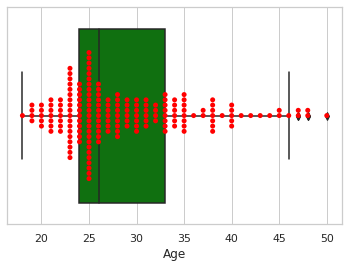

In [13]:
sns.set_theme(style="whitegrid")
# box plot for age
# box plot anlong with swarmplot plot to lay data points on top of 
# the box plot
ax = sns.boxplot(x=data['Age'],color='green')
ax = sns.swarmplot(x=data['Age'],color="red")

According to the box plot of the column **Age** there are outliers of age greater than 46 years (approx).
Here no need of special treatments for those age greater than equal to 47 as these person are normal in the sense that they can do exercises.

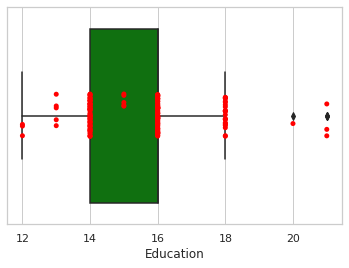

In [14]:
# Education
ax = sns.boxplot(x=data['Education'],color='green')
ax = sns.stripplot(x=data['Education'],color="red") # here use strip plot as swarm plot unable to place all the data points

Also the column **Education** has outliers of education greater than equal to 20 years.

An iteresting fact here is that there are 8 category of education in terms of years.For example there is 12 years education,13 years education,14 years education,15 years,16 years,18 years,20 years,21 years.

In [15]:
# Find the age of person who has education greater than equal to  years
data[data['Education']>=20].Age

156    25
157    26
161    27
175    40
Name: Age, dtype: int64

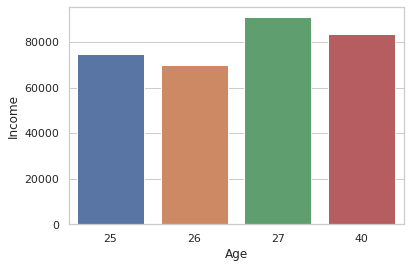

In [16]:
# Also find the income of people of age more than 25 years
sns.barplot(x=[25,26,27,40],y=data[(data['Age']>=25) & (data['Education']>=20)].Income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

As we can see the age of persons who have more than 19 years of education are greater than equal to 25.So for person of age greater than equal to 25 years ,20 years of education is normal and also they have very good income.So 20 years of education is justifiable.Therefore no need to have special treatment for these years of education.

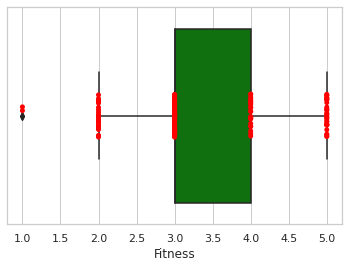

In [17]:
# Fitness
ax = sns.boxplot(x=data['Fitness'],color='green')
ax = sns.stripplot(x=data['Fitness'],color="red")

There are outliers namely scale 1.But this seems to be okay as sacle 1 could be a normal one.

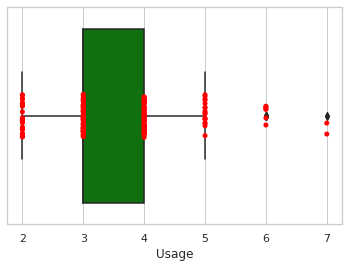

In [18]:
# Usage
ax = sns.boxplot(x=data['Usage'],color='green')
ax = sns.stripplot(x=data['Usage'],color="red")

**Usage** column also has outliers namely those are greater than equal to 6. 6 times and 7 times usage seen as akward by the box plot.
But these could be due to the fact those who have usage 6 or 7 times a weak could be professional athletes.Or they could be normal humans who are very concious about their health. No special treatment for these outliers.

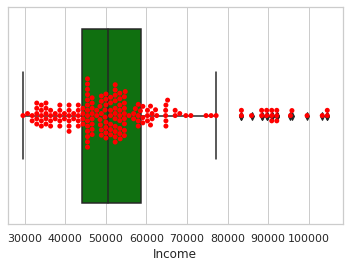

In [19]:
# Income
ax = sns.boxplot(x=data['Income'],color='green')
ax = sns.swarmplot(x=data['Income'],color="red")

There are heavy number of outliers in **Income** column.But these people might be business man or excellent professional as $ 100000 could be around 77 lakh Indian ruppees.Obviously in India most of the people do not earn that much of money but they could be businessman or excellent professional as mentioned earlier.

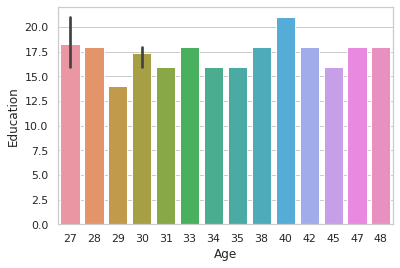

In [20]:
# Find the education as well as age of the persons who have income more than 
# 78000 dollars(or greater than equal to 80000 dollars) per annum.
df=data[data['Income']>=80000][['Age','Education']]
sns.barplot(x='Age',y='Education',data=df)
plt.show()

As we can see those people who are earning more than 80000 dollars are seems to be in the age from 27 to 48 and also everyone has atleast 12 years of education.Therefore the income more than 80000 dollars totally justifiable.As with this much years of education a person can earn this much of amount per year.Therefore there is no need of special treatment for incomes more than 80000 dollars.

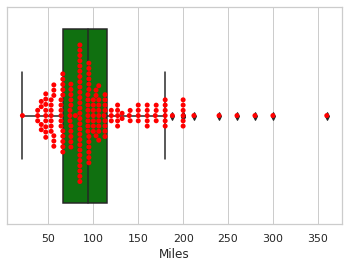

In [21]:
# Miles
ax = sns.boxplot(x=data['Miles'],color='green')
ax = sns.swarmplot(x=data['Miles'],color="red")

**Miles** has also outliers.Those are greater than 190( approx) are treated as outliers.

Now do some mathematical calculations here .1 mile is equal to 1.609 kms.
So 200 miles is around 321 kms .Therefore each day the customer has to walk/runs 45 kms.This seem to be outrageous as for normal human this is not possible .This can be possible for professional athletes but still 45 kms is to much .
Clearly 350 miles is not possible as it is around 563 kms and per day is 80 kms in a weak .This is completely out of the way.This could only be possible for marathonists .But still for marathonists 80 kms per day is outrageous.We will do one more analysis we will find the age of customers for these stats. 

# We can plot scatter plot age vs miles

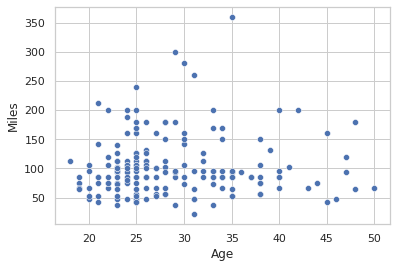

In [46]:
sns.scatterplot(x='Age',y='Miles',data=data)
plt.show()

The person who is 35 years old has run more than 350 miles this is equivalent of 563 kms .This is outrageous as he/she has ran 80kms per day. What we can do we can replace miles greater than 200 miles to 200 miles.

There are some people who are more than 35 years old ran/walked more than 180 miles a weak.This seems to be out of the world.Therefore what we can do we can replace these values with 200 miles.

In [47]:
data['ModifiedMiles']=data['Miles'].where(data['Miles']<200,200)

# We will plot usage vs income:
We are going to demonstrate the usage of persons with high mean income

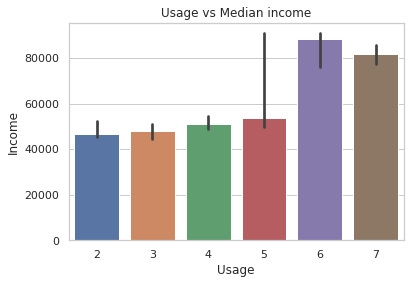

In [24]:
sns.barplot(x='Usage',y='Income',data=data,estimator=np.median) # here median used as some people have very high income
                                                                # compared to thers
plt.title("Usage vs Median income")
plt.show()

This plot indicates people with low median income have low usage time that is they are kind of lazy people.On the other hand the people with high median income seems to be more active during a week.

# Again we will have fitness vs income:
We want to check how fitness varies with median income.Again median take as some people have very high income compared to others

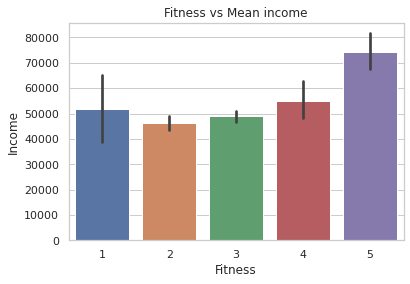

In [25]:
sns.barplot(x='Fitness',y='Income',data=data,estimator=np.mean)
plt.title("Fitness vs Mean income")
plt.show()

People with low mean income are in moderate fit.People with heighest mean income have great fitness(scale value 5) 

# Visual Analysis - Univariate & Bivariate

# Scatter plot between Education and Income
Scatterplot as well as hisplot called jointplot

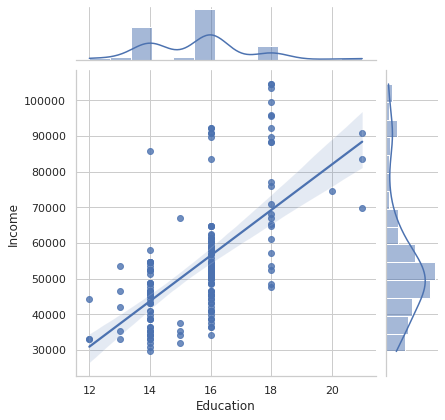

In [26]:
sns.jointplot(x='Education',y='Income',data=data,kind='reg')
plt.show()


People with high number of education years have better income than the people with low number of years education.

# Scatter plot(joint plot with histogram) between age and miles

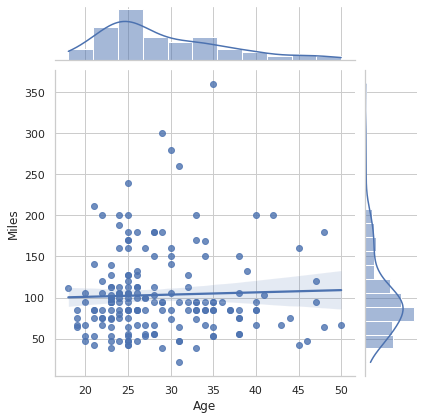

In [27]:
sns.jointplot(x='Age',y='Miles',data=data,kind='reg')
plt.show()


Younger people(age less than 35 ) seems to be more active than the aged people(age>35) according to the above plot.

# Countplot: Columns like Gender,MaritalStatus,Usage,Fitness

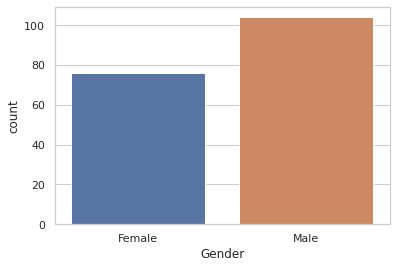

In [28]:
sns.countplot(x='Gender',data=data)

Male dominates the fitness world as per the sample of data provided Aerofit.
Male is more than 100 whereas female is more than 70.

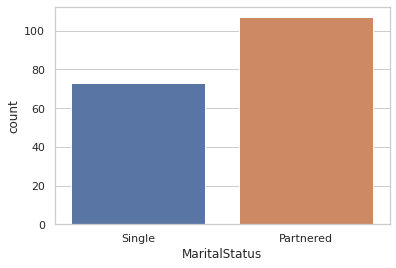

In [29]:
sns.countplot(x='MaritalStatus',data=data)

There are around 110 people with partnered whereas around 70 people are single.

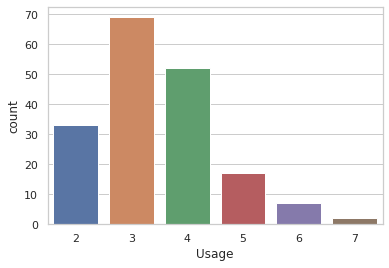

In [30]:
sns.countplot(x='Usage',data=data,palette="deep")

The people with low number of usages(4,3,2) are in greater number(approximately 153 people) than people with higher number of usages in a week.
People with higher number usages(5,6,7) are in lesser number(approximately 25 people)

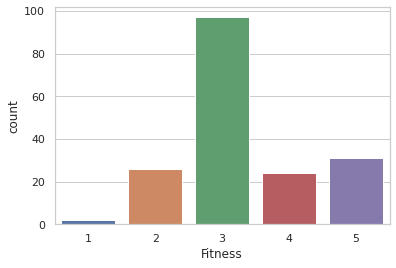

In [31]:
sns.countplot(x='Fitness',data=data)

Approximately more than 90 people are in fitness of scale 3.This indicates majority are in moderate shape(body shape)

# Education

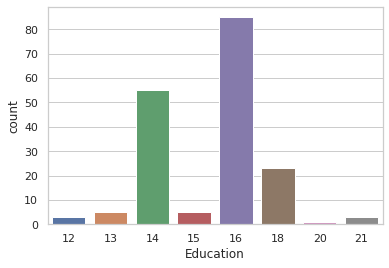

In [32]:
sns.countplot(x='Education',data=data)

Number of people with 16 years of education is more than 80

# Histograms: Miles,Income

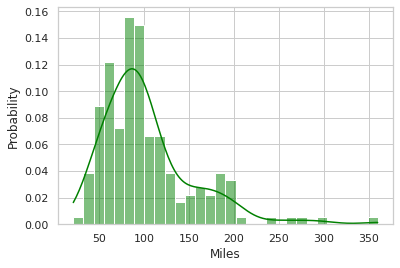

In [33]:
sns.histplot(x='Miles',data=data,color='green',bins=30,stat="probability",kde=True)

There are outliers(points at the extreme right) clearly visible in the above histogram plot

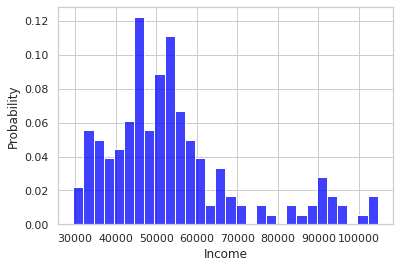

In [34]:
ax=sns.histplot(x='Income',data=data,color='blue',bins=30,stat="probability")


Approximately ony 2% of people have higher income.Whereas there 12% of people of have medium income(around $50000).

# Correlation: Age ,Education,Income,Miles

Usage and Fitness column are not fit for correlation as these are categorical variable.

In [35]:
corr=data[['Age','Education','Income','Miles']].corr()
print("correlation:\n\n",corr)

correlation:

                 Age  Education    Income     Miles
Age        1.000000   0.280496  0.513414  0.036618
Education  0.280496   1.000000  0.625827  0.307284
Income     0.513414   0.625827  1.000000  0.543473
Miles      0.036618   0.307284  0.543473  1.000000


Correlation between **Education** and **Income** is 0.625827 which indicates there is a good amount of association between education and income.

Also **Age** and **Income** has moderate correlation of approximately 0.5.

So Age and Education can be use to model income.


# Heatmap

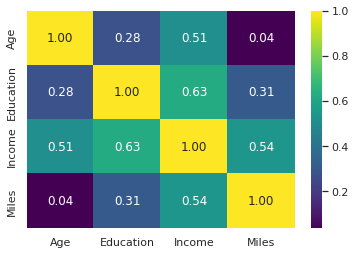

In [36]:
sns.heatmap(corr,cmap="viridis",fmt=".2f",annot=True)

**Income** and **Education** has correlation **0.63**.

**Income** and **Miles** has correlation of 0.54

**Age** and **Income** has correlation of 0.51

# Pairplot

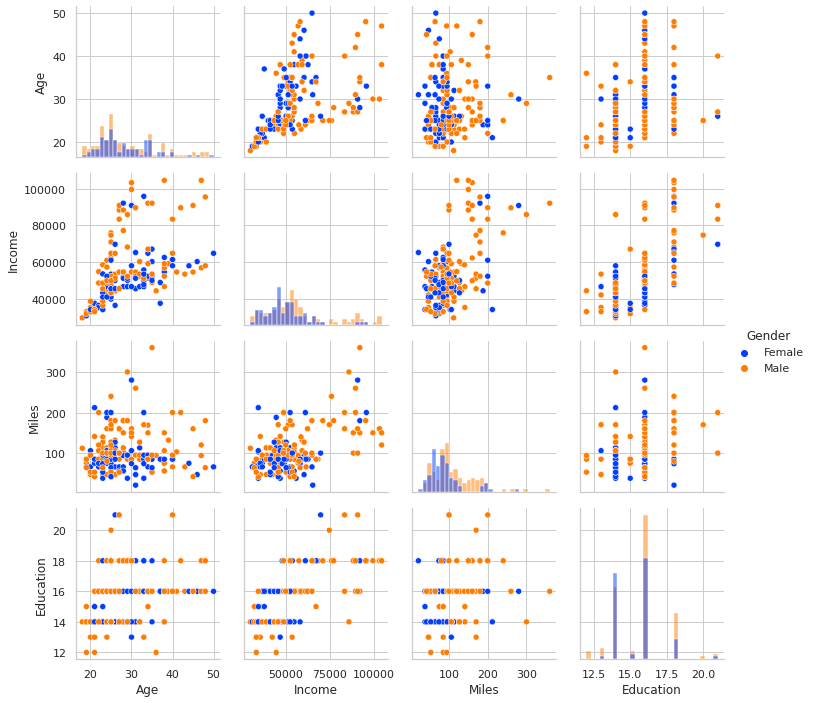

In [37]:
g = sns.PairGrid(data,vars=['Age','Income','Miles','Education'],hue="Gender")
g.map_diag(sns.histplot,bins=30,palette="bright")
g.map_offdiag(sns.scatterplot,palette="bright")
g.add_legend()

Young people of age less than 35 years are more active than people with age more than 35 years.

People with moderate income(less than equal to 60000 dollars per annum) are in majority and ran/walked less than equal to 200 miles. 



# 1 - Conditional probability AND two-way contigency table

In [38]:
# contigency table for product and gender
conti_table=pd.crosstab(index=data['Product'],columns=data['Gender'])
print("Two-way contigency table between products and gender:\n\n",conti_table)

Two-way contigency table between products and gender:

 Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33


# 1.1 - Conditional probability of product and gender

In [39]:
# conditional probability of product and gender
# normalize each column to have probability
cond_prob_gender=pd.crosstab(index=data['Product'],columns=data['Gender'],normalize="columns")
print("Conditional Probability of Product and Gender:\n\n",cond_prob_gender)

Conditional Probability of Product and Gender:

 Gender     Female      Male
Product                    
KP281    0.526316  0.384615
KP481    0.381579  0.298077
KP781    0.092105  0.317308


Probability of male(among all the males) purpasing **KP281** is **0.384615** approximately **38%** and 
Probability of female(among all the females) purpasing **KP281** is **0.526316** approximately **52%**

Probability of male purpasing **KP481** is **0.298077** approximately **30%** and
Probability of female purpasing **KP481** is **0.381579** approximately **38%**

Probability of male purpasing **KP781** is **0.317308** approximately **32%** and
Probability of female purpasing **KP781** is **0.092105** approximately **9%**





# Marginal probability of products

In [40]:
marginal_prob=pd.crosstab(index=data['Product'],columns=data['Gender'],normalize="columns",margins=True)
marginal_prob.columns=['Female','Male','Marginal Prob']
print("Probability of customers purpased each product:\n\n",marginal_prob)

Probability of customers purpased each product:

            Female      Male  Marginal Prob
Product                                   
KP281    0.526316  0.384615       0.444444
KP481    0.381579  0.298077       0.333333
KP781    0.092105  0.317308       0.222222


Approximately **44%** customers purpased **KP281**

Approximately **33%** customers purpased **KP481**

Approximately **22%** customers purpased **KP781**





# 1.2 - Conditional probability of Product and usage and contigency table

In [41]:
# contigency table for product and usage
conti_table=pd.crosstab(index=data['Product'],columns=data['Usage'])
print("Two-way contigency table between products and Usages:\n\n",conti_table)

Two-way contigency table between products and Usages:

 Usage     2   3   4   5  6  7
Product                      
KP281    19  37  22   2  0  0
KP481    14  31  12   3  0  0
KP781     0   1  18  12  7  2


In [42]:
cond_usage=pd.crosstab(data['Product'],columns=data['Usage'],normalize="columns")
print("Probability of each product based on usage:\n\n",cond_usage.T)


Probability of each product based on usage:

 Product     KP281     KP481     KP781
Usage                                
2        0.575758  0.424242  0.000000
3        0.536232  0.449275  0.014493
4        0.423077  0.230769  0.346154
5        0.117647  0.176471  0.705882
6        0.000000  0.000000  1.000000
7        0.000000  0.000000  1.000000


P(Usage=2|Product=KP281 )=0.575758 approximately 57%.The 57% customers(among all the customers who used product only 2 times a week ) used **KP281** product. Whereas 42 % used **KP481** and 
No customers(among all the customers who used product only 2 times a week ) used **KP781**.

P(Usage=6|Product=KP281 )=0 and P(Usage=6|Product=KP281 )=0
No customers(among all the customers who used product only 6 times a week) used **KP281** and **KP481**.

Similarly,P(Usage=7|Product=KP281 )=0 and P(Usage=7|Product=KP281 )=0
No customers(among all the customers who used product only 7 times a week) used **KP281** and **KP481**.

# 1.2 - Conditional probability of product and marital status and contigency table

In [43]:
conti_table=pd.crosstab(data['Product'],columns=data['MaritalStatus'])
print("Two-way contigency table between products and marital status:\n\n",conti_table)

Two-way contigency table between products and marital status:

 MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17


In [44]:
cond_marital=pd.crosstab(data['Product'],columns=data['MaritalStatus'],normalize="columns")
print("Probability of partnered/single purchased each product:\n\n",cond_marital.T)

Probability of partnered/single purchased each product:

 Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.448598  0.336449  0.214953
Single         0.438356  0.328767  0.232877


44% couples(among all the couples) purchased **KP281**, 33% purchased **KP481** and 21% purchased **KP781**


43% singles(among all the singles) purchased **KP281**, 32% purchased **KP481** and 23% purchased **KP781**


# Customer Profiling:Categorize customers into different groups based on "Income**.

Also we are going to find percentage of customers purchased each product for each group

([<matplotlib.axis.XTick at 0x7fb756e11050>,
 [Text(0, 0, '(29486.981, 44565.8]'),
  Text(1, 0, '(44565.8, 59569.6]'),
  Text(2, 0, '(59569.6, 74573.4]'),
  Text(3, 0, '(74573.4, 89577.2]'),
  Text(4, 0, '(89577.2, 104581.0]')])

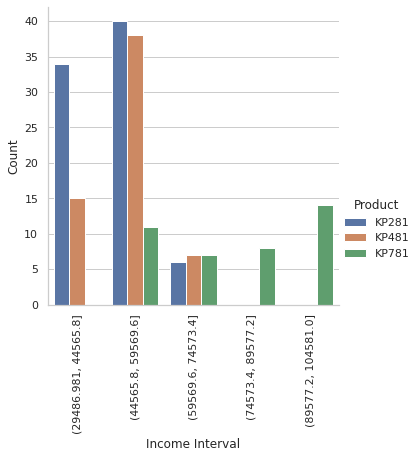

In [45]:
# first create five groups using pd.cut
data['Income_segment']=pd.cut(data['Income'],5)
df=data.groupby(by=['Income_segment','Product'])['Age'].agg("count").reset_index()
sns.catplot(x='Income_segment',y='Age',hue='Product',kind="bar",data=df)
plt.ylabel("Count")
plt.xlabel("Income Interval")
plt.xticks([])
plt.xticks([0,1,2,3,4],df['Income_segment'].unique(),rotation=90)

Approximately 40 customers whose income is in the range of 44000 to 59000 dollars  purchase **KP281** product and more than 35 customers purchased **KP481** product whereas around 10 customers purchase **KP781** product.

Around 30 customers whose income is in the range of 29000 to 44000 dollars purchased **KP281** product and around 15 customers purchased **KP481** but no one purchased **KP781**

If we add 40+30=70 customers with income in the range of 29000 to 59000 dollars have purchased **KP281**

On the other hand in the same range 35+15=50 customers purchased **KP481**.

Here the income is playing big factor as **KP781** costs around 2500 dollars and no one with income range 29000 to 44000 has purchased it.
  

# RECOMMENDATION:

1. 
Those customers whose median income is 80000 dollars and more  they are most puntual in terms of usage as they have usage 6 or 7 times a week. So money is playing a big factor here. These customers are valuable as when waranty expired they most probably will purchase the products again.

2. 
Customers having mean income more than 70000 dollars are more fit than the other customers.This indicates that these customers are very much health concious and company could target customers whose mean income is more than 70000 dollars.

3.
Among 104 male customers around 38% of them i.e 39 customers 
purchased **KP281** Whereas around 52% female customers of 76 i.e 39 customers purchased **KP281**
Total=39+39=78 customers of 180 total customers purchased **KP281***.
On the other hand  30% male purchased **KP481** and 38% female purchased **KP481**.

Total customers purchased **KP481** is 31+28=59.

Therefore total customers purchased **KP281** and **KP481** is 137.So this number is way bigger as there is only 180 customers.What company could do here they can focus much on **KP281** and **KP481** products.Also the money is playing a big factor.



4.
44% customers purchased **KP281** and 37% purchased **KP481**.So company should pay more attention to these products.



5.
44% couples of 107 couplers purchased KP281, 33% purchased KP481 and 21% purchased KP781

43% singles of 73 purchased KP281, 32% purchased KP481 and 23% purchased KP781

Again here among couples as well as singles the products **KP281** and **KP481** are more famous.So company should pay great attention to the products.


6.
 
Last but not least around 70 customers with income in the range of 29000 to 59000 dollars have purchased KP281

On the other hand in the same range around 50 customers purchased KP481.

But Customers with income in the range of 29000 to 59000 dollars per annum have purchased around 11 **KP781** products.
Here money is playing a big factor.Hence company should focus on porducts fall in the category of **KP281** and **KP481**

